"How can we build a prediction system to detect electric car component failures before they occur?"

## Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Dataset Handling

In [2]:
df = pd.read_csv('engine_data.csv')
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (19535, 7)

Missing Values:
 Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [3]:
# Remove irrelevant columns
features_to_drop = ['timestamp', 'vehicle_id']
for col in features_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

In [4]:
# Handle missing values if any
df = df.dropna()

In [5]:
df = pd.read_csv('engine_data.csv')
print("Columns:", df.columns.tolist())

Columns: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp', 'Engine Condition']


In [6]:
le = LabelEncoder()
df['Engine Condition'] = le.fit_transform(df['Engine Condition'])


In [7]:
# Split features and target 
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

In [8]:
# Balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

/Users/kovarthanan/Acedamic/City, University of London/INM702- Programming and Mathematics for Artificial Intelligence/Coursework/INM702/.venv/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/kovarthanan/Acedamic/City, University of London/INM702- Programming and Mathematics for Artificial Intelligence/Coursework/INM702/.venv/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-l

In [9]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [10]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

Shapes: (17243, 6) (3695, 6) (3696, 6)


In [11]:
# Remove outliers using IQR
def remove_outliers(df, column):
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
   return df

In [12]:
for column in df.columns[:-1]:  # Exclude target column
   df = remove_outliers(df, column)

print("\nShape after cleaning:", df.shape)



Shape after cleaning: (14884, 7)


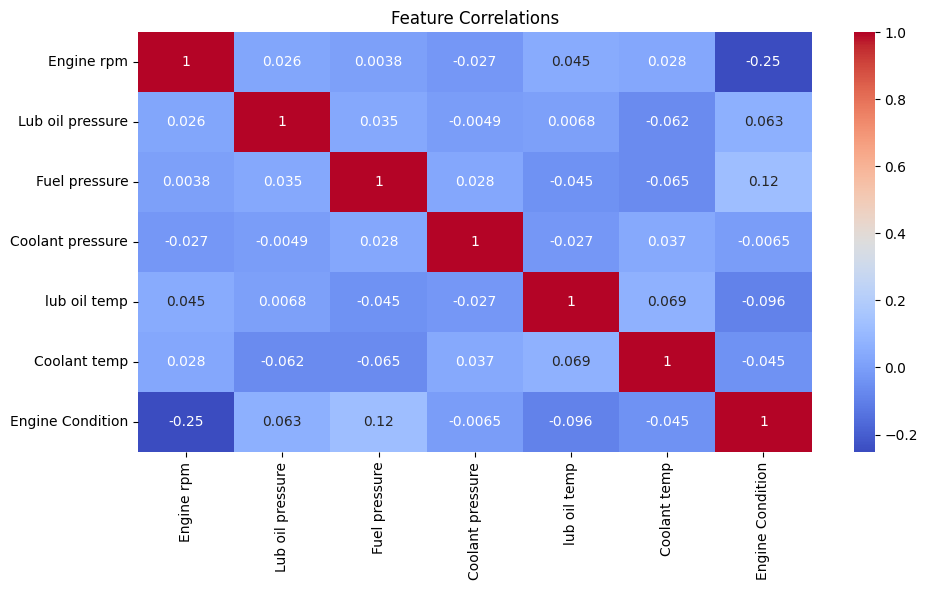

In [13]:
# Basic EDA
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

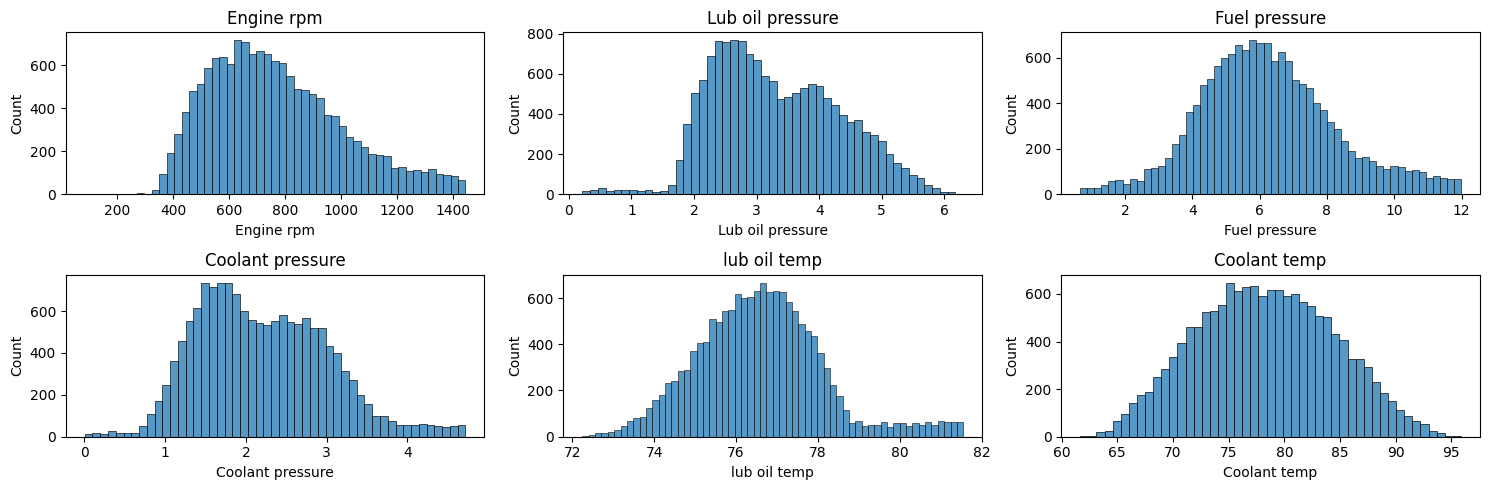

In [14]:
# Distribution plots
plt.figure(figsize=(15, 5))
for i, column in enumerate(df.columns[:-1], 1):
   plt.subplot(2, 3, i)
   sns.histplot(data=df, x=column)
   plt.title(column)
plt.tight_layout()
plt.show()

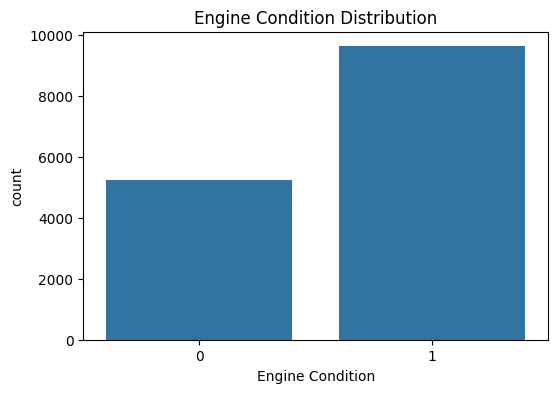


Class distribution:
Engine Condition
1    9627
0    5257
Name: count, dtype: int64


In [15]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Engine Condition')
plt.title('Engine Condition Distribution')
plt.show()

print("\nClass distribution:")
print(df['Engine Condition'].value_counts())

In [16]:
# Load data and check unique values
df = pd.read_csv('engine_data.csv')
print("Engine Condition categories:", df['Engine Condition'].unique())
print("\nCount of each category:")
print(df['Engine Condition'].value_counts())

Engine Condition categories: [1 0]

Count of each category:
Engine Condition
1    12317
0     7218
Name: count, dtype: int64


Sigmoid and Relu

In [17]:
# Sigmoid: Used for binary classification (0-1)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [18]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [19]:
import numpy as np

In [20]:
# Test functions
x = np.array([-2, -1, 0, 1, 2])
print("Sigmoid:", sigmoid(x))
print("ReLU:", relu(x))

Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
ReLU: [0 0 0 1 2]


Softmax layer

In [21]:
def softmax(x):
    # Subtract max for numerical stability
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [22]:
def softmax_backward(dA, Z):
    """
    dA: gradient of loss with respect to softmax output
    Z: input to softmax
    """
    S = softmax(Z)
    return S * (dA - (dA * S).sum(axis=1, keepdims=True))

In [23]:
# Test
x = np.array([[1, 2, 3], [4, 5, 6]])
print("Softmax output:", softmax(x))

Softmax output: [[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


In [24]:
# Test
x = np.array([[1, 2, 3], [4, 5, 6]])
print("Softmax output:", softmax(x))

Softmax output: [[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


## Dense Layer

In [ ]:
class Dense_layer:
    """
    This class is used to define the dense layer in Neural Networks. 
    This included forward and backward propagation.
    """
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward_propagation(self, input_layer):
        self.input_layer = input_layer
        self.output_layer = np.dot(input_layer, self.weights) + self.biases
        return self.output_layer
    
    def backward_propagation(self):
        pass

## Sigmoid - Activation Function

In [ ]:
class Sigmoid:
    """ 
    This class represents the sigmoid activation function.
    """
    def __init__(self):
        pass
    def forward_propagation(self, input):
        self.inputs = input
        self.output = 1 / (1 + np.exp(-input))
        return self.output
    
    def backward_propagation(self):
        pass

## Relu Activation Function

In [ ]:
class Relu:
    """ 
    This class is for define Rectified Linear Unit (Relu) activation funciton.
    """
    def __init__(self):
        pass
    def forward_propagation(self, input):
        self.input = input
        self.output = np.maximum(0, input)
        return self.output
    
    def backward_propagation(self):
        pass

## Softmax - Activation Function

In [ ]:
class Softmax:
    """ 
    This class is for define Softmax activation funciton.
    """
    def __init__(self):
        pass
    
    def forward_propagation(self, input):
        self.input = input
        ex = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = ex / np.sum(ex, axis=1, keepdims=True)
        return self.output
    
    def backward_propagation(self):
        pass

## Dropout

In [ ]:
class Dropout:
    def __init__(self):
        pass

## Neural Network

In [ ]:
class Neural_network:
    def __init__(self):
        pass

    def add_layer(self):
        pass

    def forward_propagation(self):  
        pass

    def backward_propagation(self):
        pass

    def train(self):
        pass

    def predict(self):
        pass